<a href="https://colab.research.google.com/github/johnmoses12/Commodity-Price-Forecasting/blob/main/Forecasting_Agricultural_Commodity_Prices_Using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Forecasting Agricultural Commodity Prices Using Machine Learning using Central Tendency Measures


🔍 Crop: Maize

📊 Measures of Central Tendency:
Mean: 1506.1077595628415
Median: 1387.85
Mode: 892.99


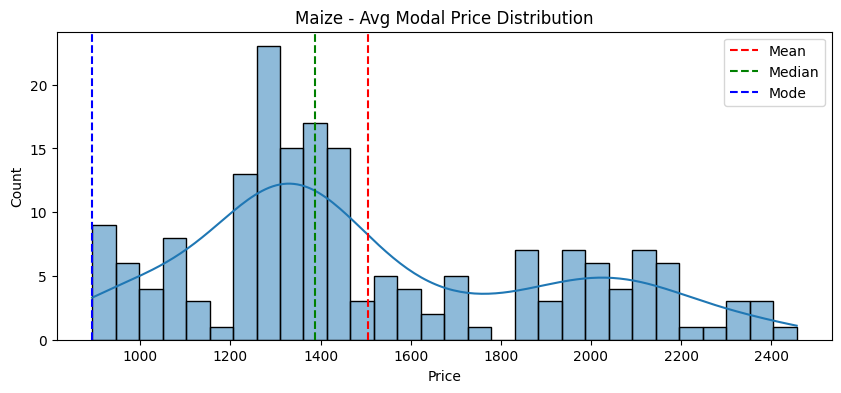

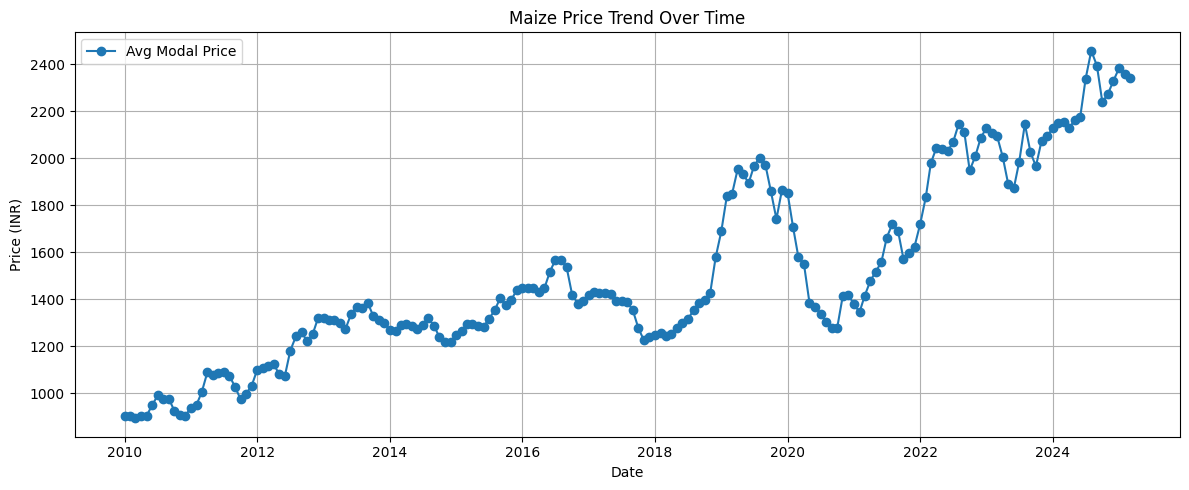

📈 Mean Squared Error (ML Prediction) for Maize: 32315.75


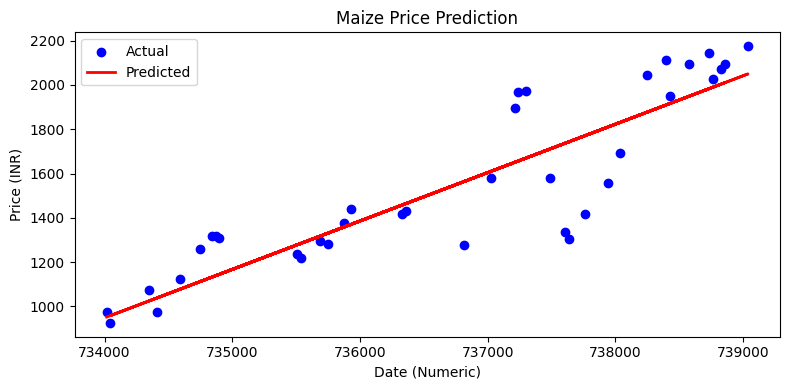


🔍 Crop: Wheat

📊 Measures of Central Tendency:
Mean: 1791.059945355191
Median: 1706.73
Mode: 1558.58


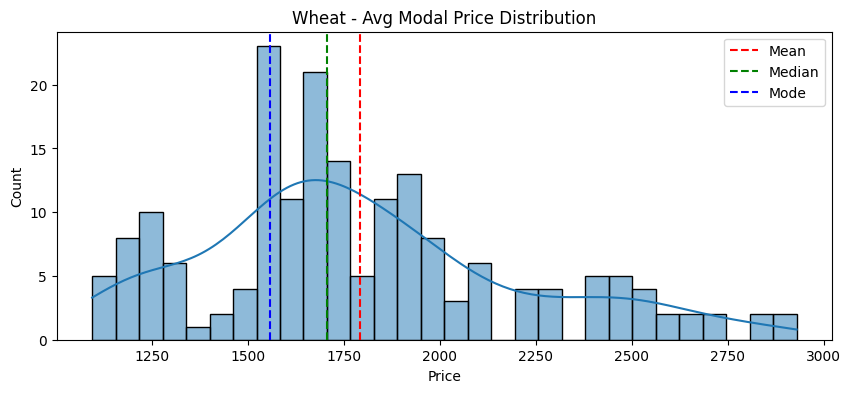

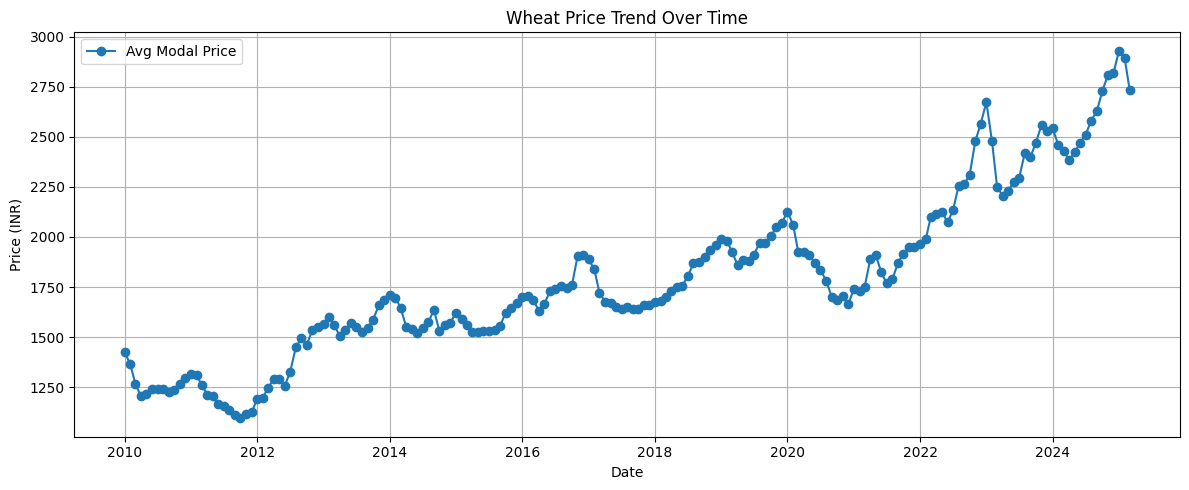

📈 Mean Squared Error (ML Prediction) for Wheat: 22313.47


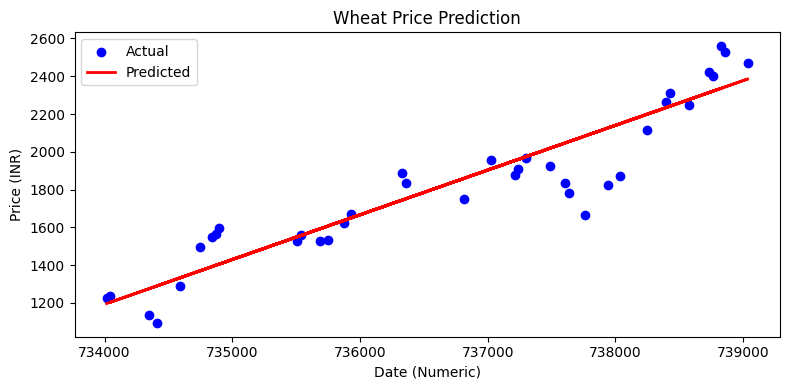


🔍 Crop: Rice

📊 Measures of Central Tendency:
Mean: 2662.004480874317
Median: 2728.02
Mode: 1861.71


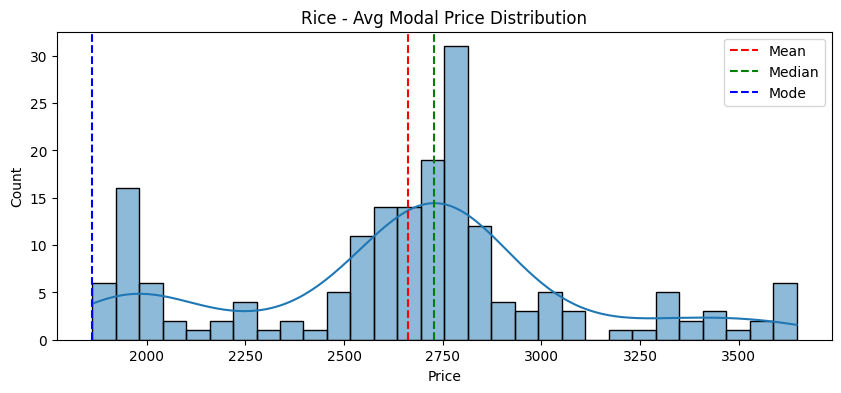

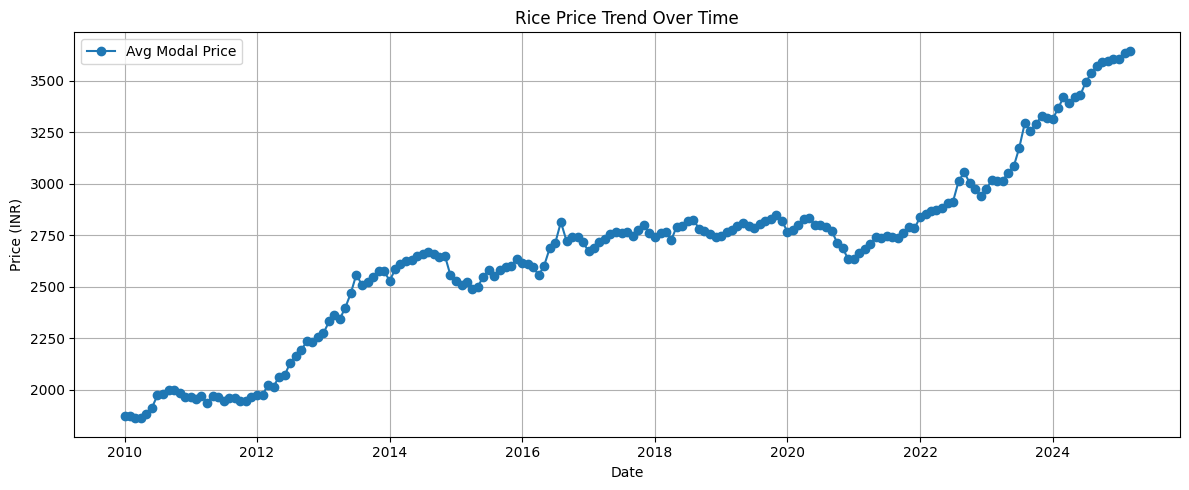

📈 Mean Squared Error (ML Prediction) for Rice: 19604.40


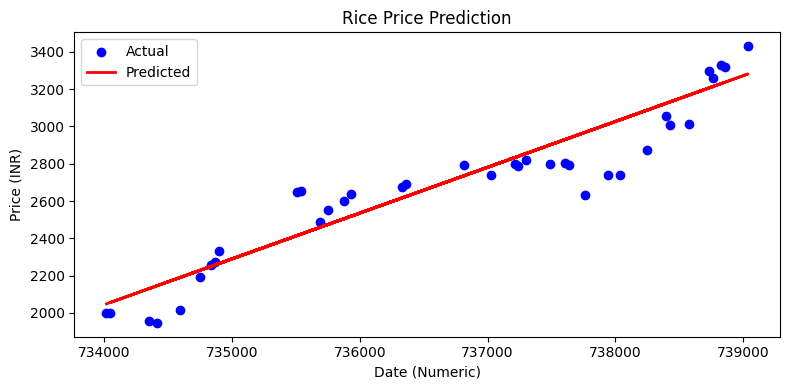

In [ ]:
# Step 1: Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Step 2: Load dataset
df = pd.read_csv('crop_price_dataset.csv')  # Upload this file in Colab first
df['month'] = pd.to_datetime(df['month'])

# Step 3: List of crops
crops = ['Maize', 'Wheat', 'Rice']

for crop in crops:
    print(f"\n🔍 Crop: {crop}")
    crop_df = df[df['commodity_name'].str.lower() == crop.lower()].copy()

    if crop_df.empty:
        print("No data found.\n")
        continue

    #  Central Tendency Measures
    modal_prices = crop_df['avg_modal_price']
    print("\n📊 Measures of Central Tendency:")
    print("Mean:", modal_prices.mean())
    print("Median:", modal_prices.median())
    print("Mode:", modal_prices.mode().values[0])  # taking first mode

    # Visualization
    plt.figure(figsize=(10, 4))
    sns.histplot(modal_prices, bins=30, kde=True)
    plt.axvline(modal_prices.mean(), color='red', linestyle='--', label='Mean')
    plt.axvline(modal_prices.median(), color='green', linestyle='--', label='Median')
    plt.axvline(modal_prices.mode().values[0], color='blue', linestyle='--', label='Mode')
    plt.title(f"{crop} - Avg Modal Price Distribution")
    plt.xlabel("Price")
    plt.legend()
    plt.show()

    # Price trend plot
    plt.figure(figsize=(12, 5))
    plt.plot(crop_df['month'], crop_df['avg_modal_price'], marker='o', label='Avg Modal Price')
    plt.title(f"{crop} Price Trend Over Time")
    plt.xlabel("Date")
    plt.ylabel("Price (INR)")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    #  Machine Learning - Linear Regression Forecasting
    crop_df['Date_Num'] = crop_df['month'].map(pd.Timestamp.toordinal)
    X = crop_df[['Date_Num']]
    y = crop_df['avg_modal_price']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"📈 Mean Squared Error (ML Prediction) for {crop}: {mse:.2f}")

    # Prediction plot
    plt.figure(figsize=(8, 4))
    plt.scatter(X_test, y_test, color='blue', label='Actual')
    plt.plot(X_test, y_pred, color='red', label='Predicted', linewidth=2)
    plt.title(f"{crop} Price Prediction")
    plt.xlabel("Date (Numeric)")
    plt.ylabel("Price (INR)")
    plt.legend()
    plt.tight_layout()
    plt.show()
